#Projeto Final - Redes Neurais Artificiais (RNAs)

1. Introdução

O projeto faz parte de uma análise final em Redes Neurais Artificiais (RNAs), que utiliza redes neurais para classificar dados de pacientes com Parkinson, ajudando a identificar padrões que distinguem entre indivíduos com a condição e aqueles sem a condição.
2. Metodologia

2.1 Importação das Bibliotecas

As principais bibliotecas usadas incluem:

    Pandas e NumPy: para manipulação e análise de dados.
    Matplotlib e Seaborn: para visualização de dados, incluindo gráficos de correlação e matrizes de confusão.
    Scikit-Learn: para pré-processamento, divisão dos dados e construção do modelo.

2.2 Carregamento e Análise dos Dados

O conjunto de dados é carregado e resumido:

    Dimensão dos dados: indica o número de linhas e colunas.
    Estatísticas descritivas: análise exploratória para entender a distribuição e variabilidade das variáveis.

2.3 Análise Visual dos Dados

Uma matriz de correlação é gerada entre variáveis numéricas para identificar correlações. Essas relações são cruciais para entender quais variáveis podem ter maior influência na classificação.
2.4 Pré-processamento dos Dados

O pré-processamento inclui:

    Normalização: As variáveis são escaladas para um intervalo entre 0 e 1 usando MinMaxScaler, essencial para o bom desempenho da rede neural.
    Separação de variáveis de entrada (X) e variável-alvo (y): onde status é a variável de interesse.
    Divisão do conjunto de dados: Em treino e teste, usando uma divisão de 80/20 para garantir que o modelo possa ser avaliado de forma independente.

3. Desenvolvimento e Treinamento do Modelo

3.1 Configuração do Modelo

O modelo usado é o MLPClassifier (Perceptron Multicamadas), adequado para tarefas de classificação. A função model_training implementa o processo de treinamento e avaliação.
3.2 Parâmetros do Modelo

O treinamento é realizado para diferentes configurações de parâmetros:

    Camadas ocultas: 50, 100 e 150 neurônios.
    Funções de ativação: relu e tanh.
    Otimizadores: lbfgs e sgd.

Cada combinação de parâmetros é testada para encontrar a configuração mais precisa.
3.3 Avaliação do Modelo

Para cada modelo treinado, são calculadas as seguintes métricas:

    Acurácia: proporção de previsões corretas.
    Recall: capacidade do modelo de identificar corretamente casos positivos.
    F1-score: média harmônica da precisão e recall.
    Precisão: proporção de verdadeiros positivos em relação ao total de previsões positivas.

Além disso, uma matriz de confusão é gerada para cada configuração, oferecendo uma visão visual dos erros de classificação. O relatório de classificação fornece detalhes sobre o desempenho do modelo em cada classe.
4. Resultados

4.1 Visualização das Métricas

As métricas (acurácia, recall, F1-score e precisão) são comparadas para cada modelo utilizando gráficos de barras. Isso permite identificar a combinação de parâmetros que melhor se adequa aos dados, destacando o modelo mais eficiente.


In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df = pd.read_csv('parkinsons data.csv')
print("Dimensão dos dados:")
print(df.shape)
print("Estatística descritiva das variáveis:")
df.describe().transpose()




Dimensão dos dados:
(195, 24)
Estatística descritiva das variáveis:


,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


#Exploração visual dos dados

# Correlação entre as variáveis numéricas

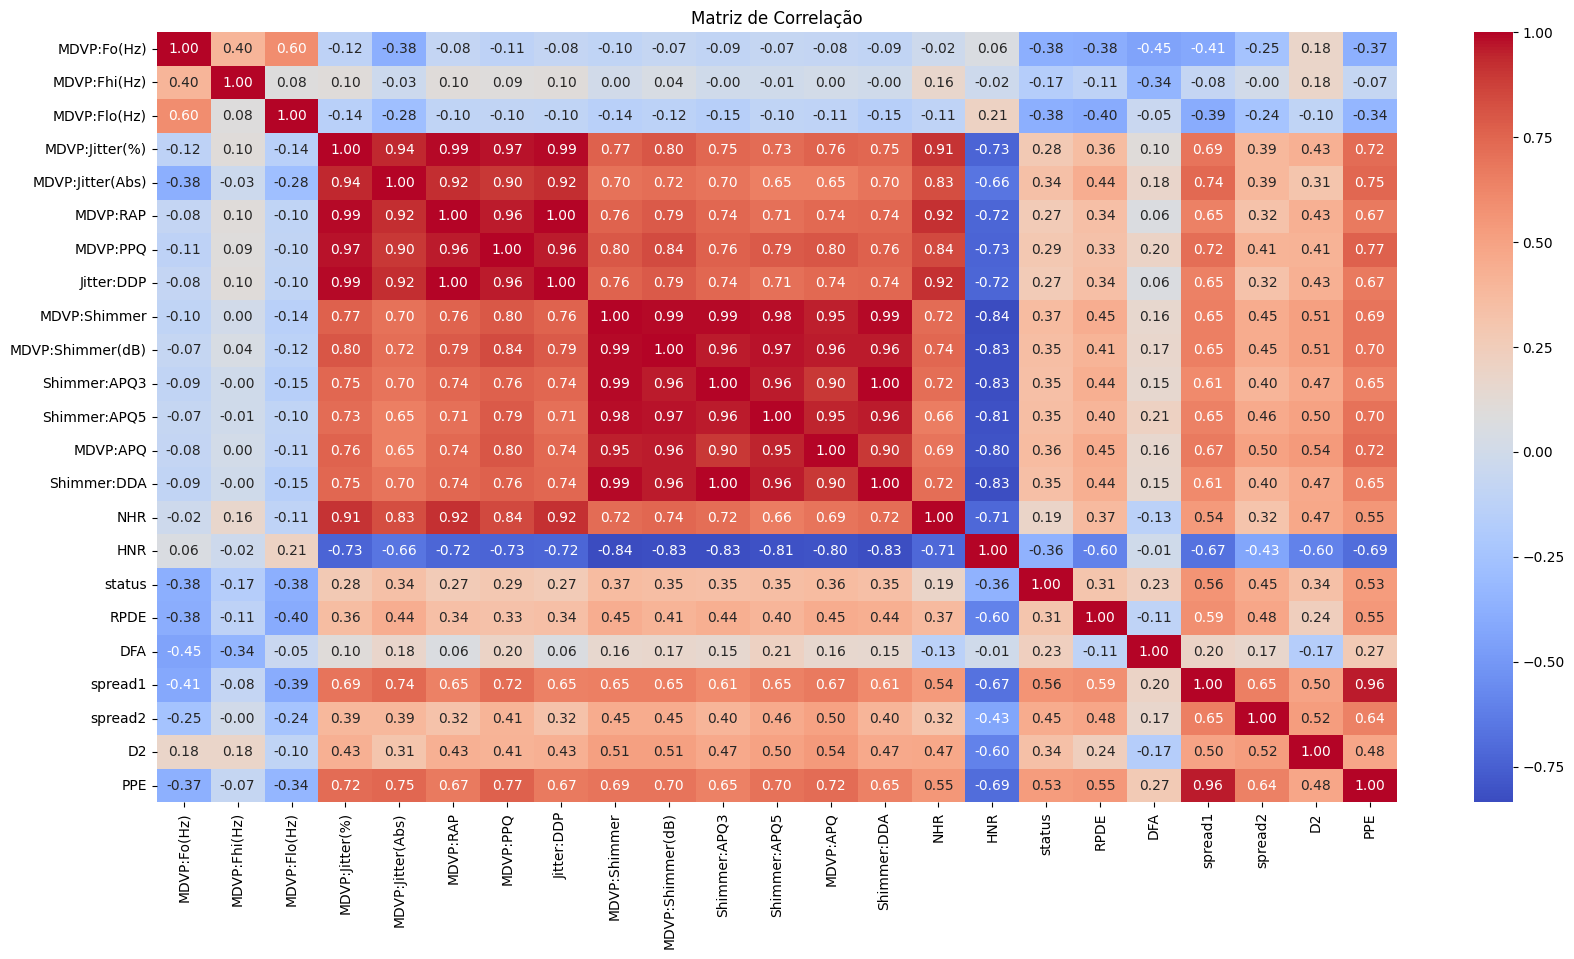

In [ ]:
# Selecionar apenas colunas numéricas para calcular a correlação
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(20, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

#Pré-processamento e divisão do conjunto de dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df = df.drop('name', axis=1)
target_column = ['status']
predictors = list(set(list(df.columns)) - set(target_column))
scaler = MinMaxScaler()
df[predictors] = scaler.fit_transform(df[predictors])
df[predictors].describe().transpose()
X = df[predictors].values
y = df[target_column].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Construção, treinamento e variação dos parâmetros da RNA

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


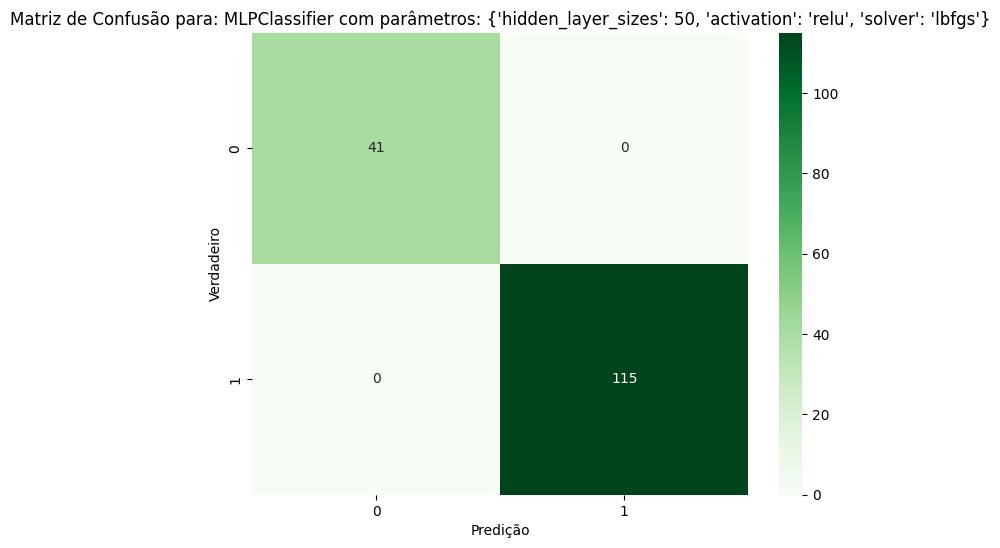

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00       115

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


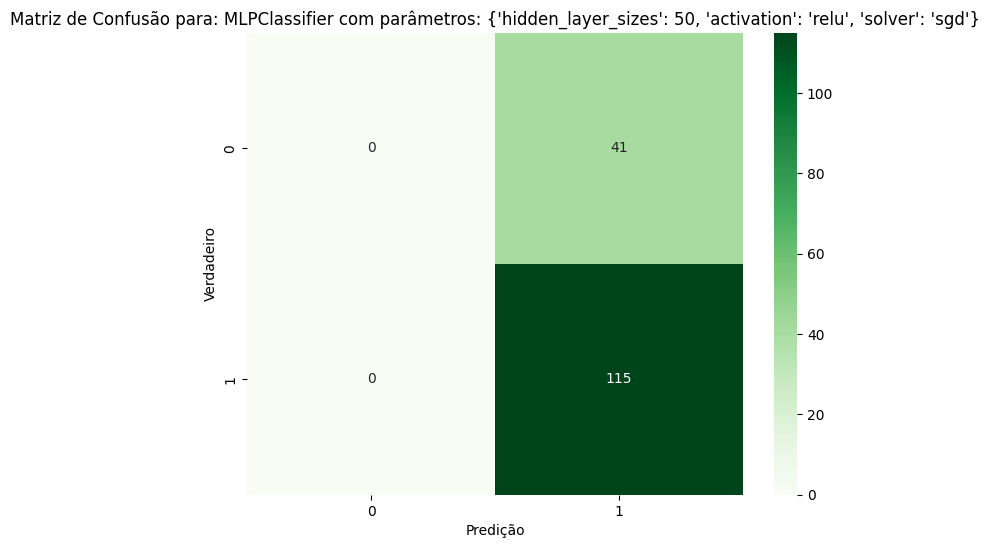

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/n

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.74      1.00      0.85       115

    accuracy                           0.74       156
   macro avg       0.37      0.50      0.42       156
weighted avg       0.54      0.74      0.63       156



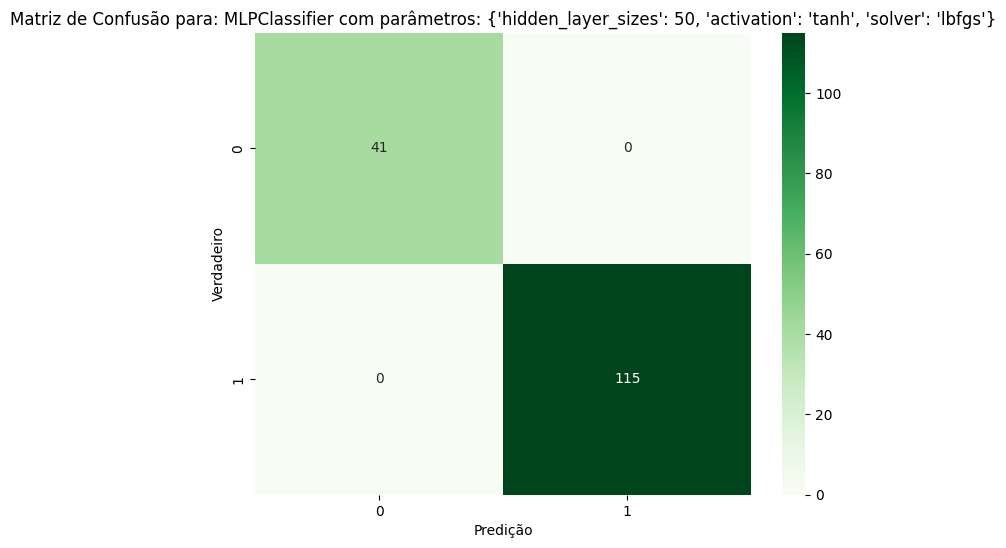

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00       115

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


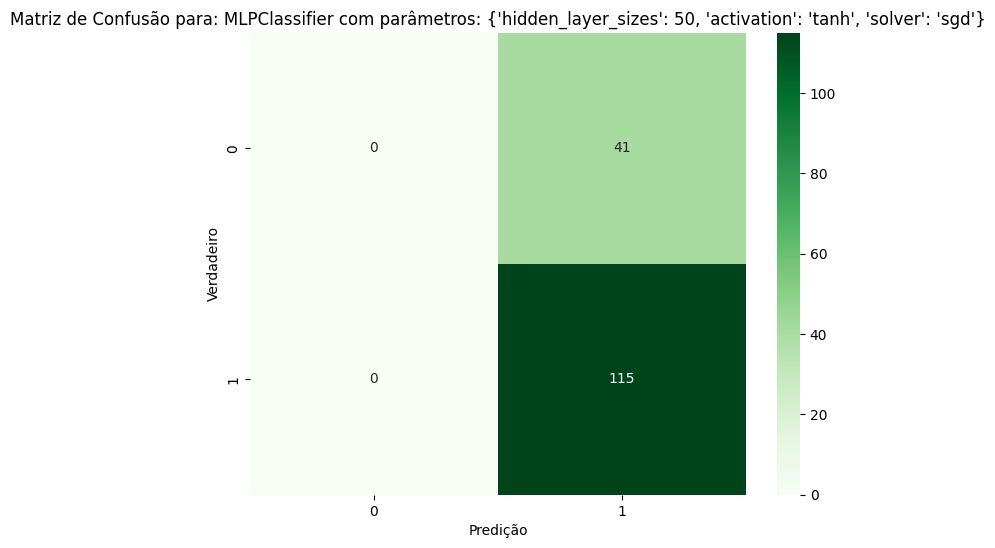

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/n

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.74      1.00      0.85       115

    accuracy                           0.74       156
   macro avg       0.37      0.50      0.42       156
weighted avg       0.54      0.74      0.63       156



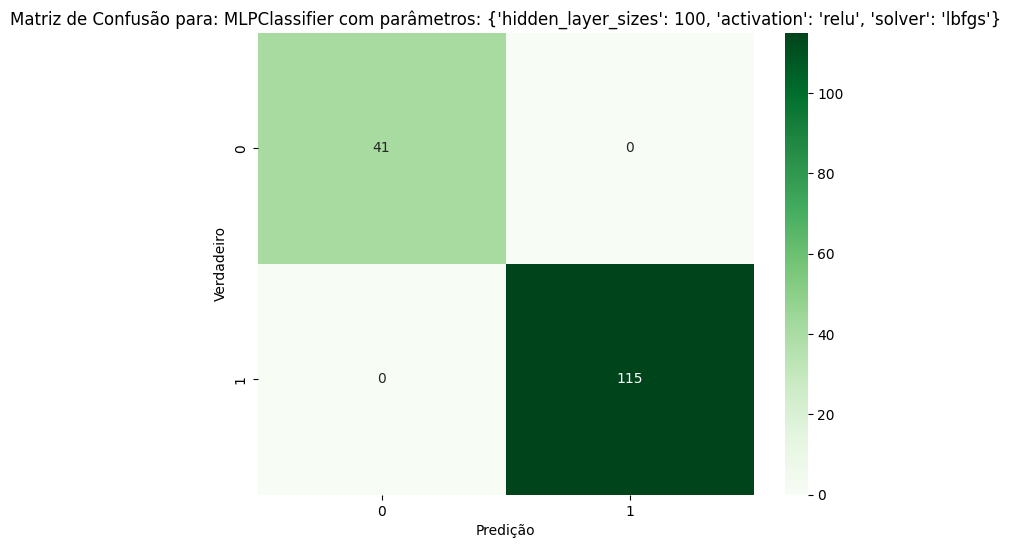

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00       115

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


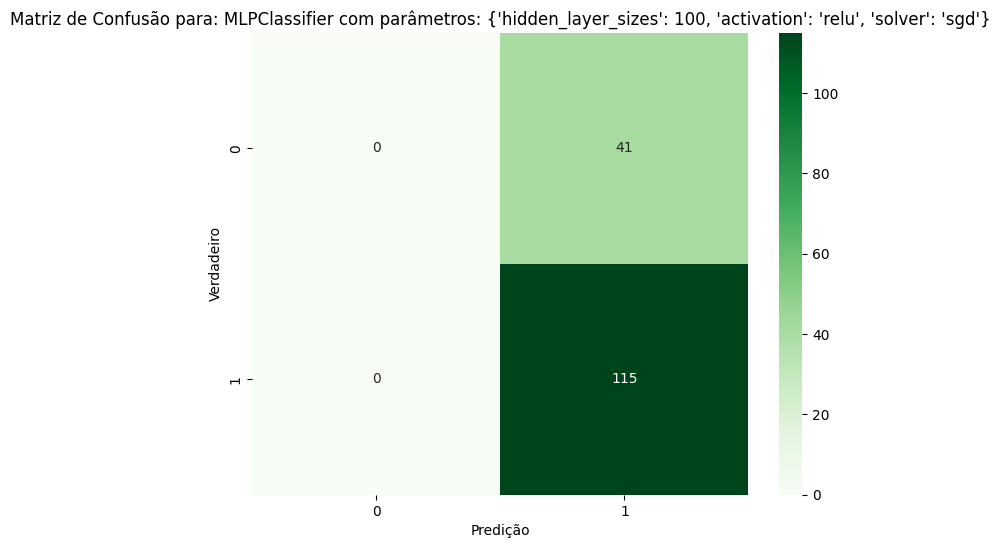

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/n

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.74      1.00      0.85       115

    accuracy                           0.74       156
   macro avg       0.37      0.50      0.42       156
weighted avg       0.54      0.74      0.63       156



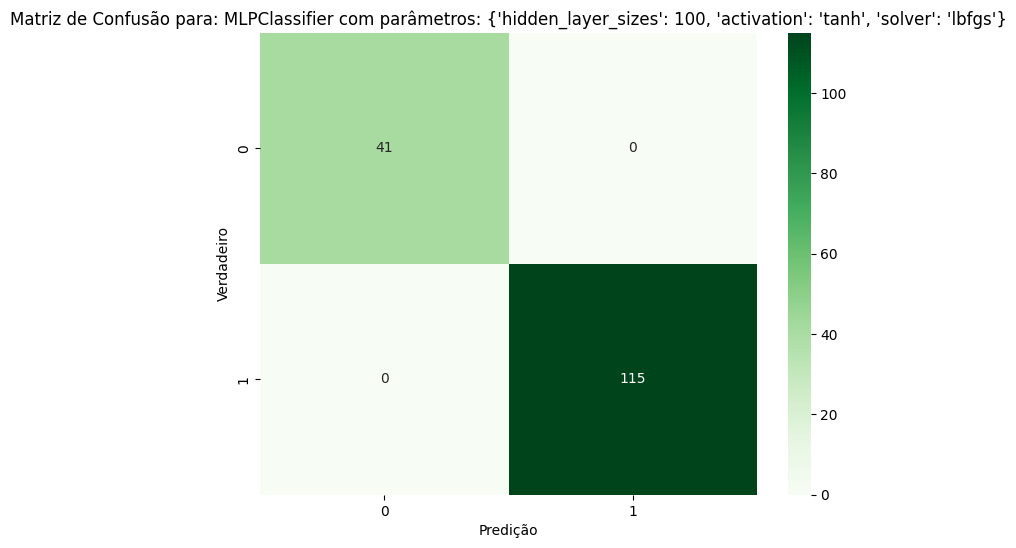

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00       115

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


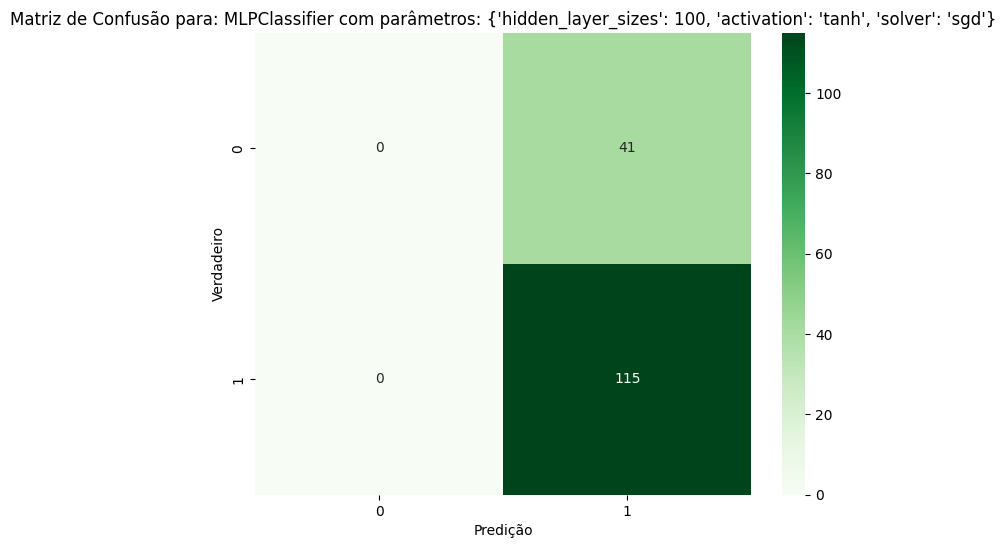

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/n

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.74      1.00      0.85       115

    accuracy                           0.74       156
   macro avg       0.37      0.50      0.42       156
weighted avg       0.54      0.74      0.63       156



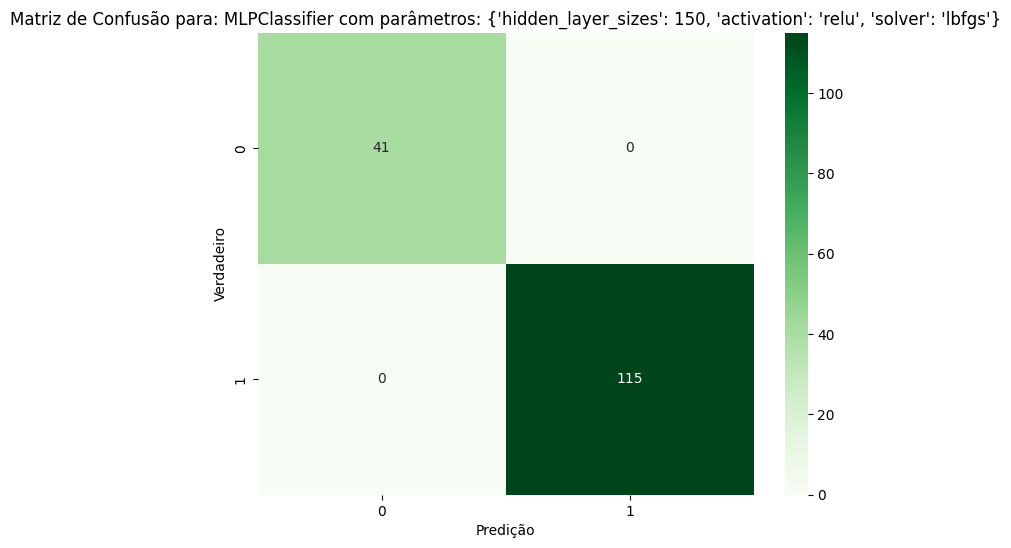

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00       115

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


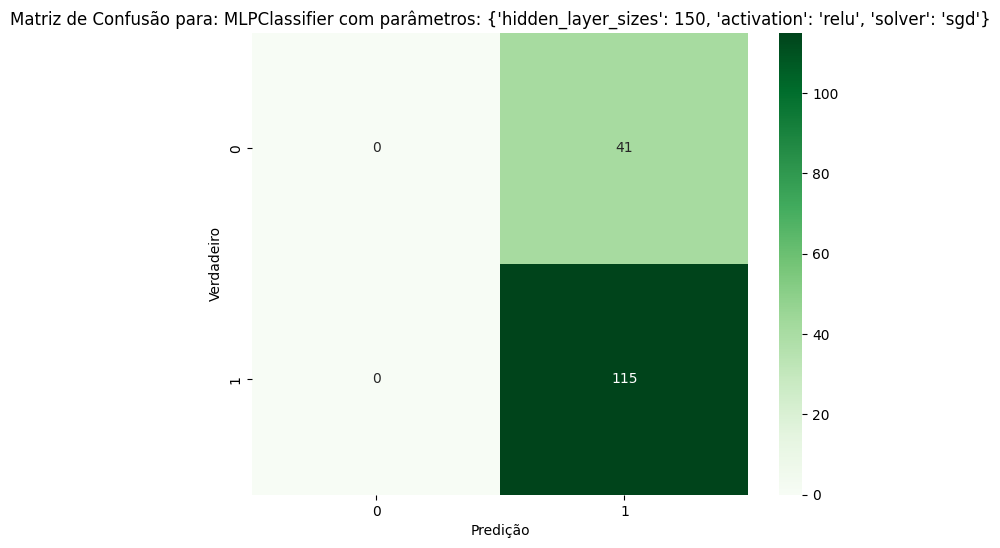

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/n

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.74      1.00      0.85       115

    accuracy                           0.74       156
   macro avg       0.37      0.50      0.42       156
weighted avg       0.54      0.74      0.63       156



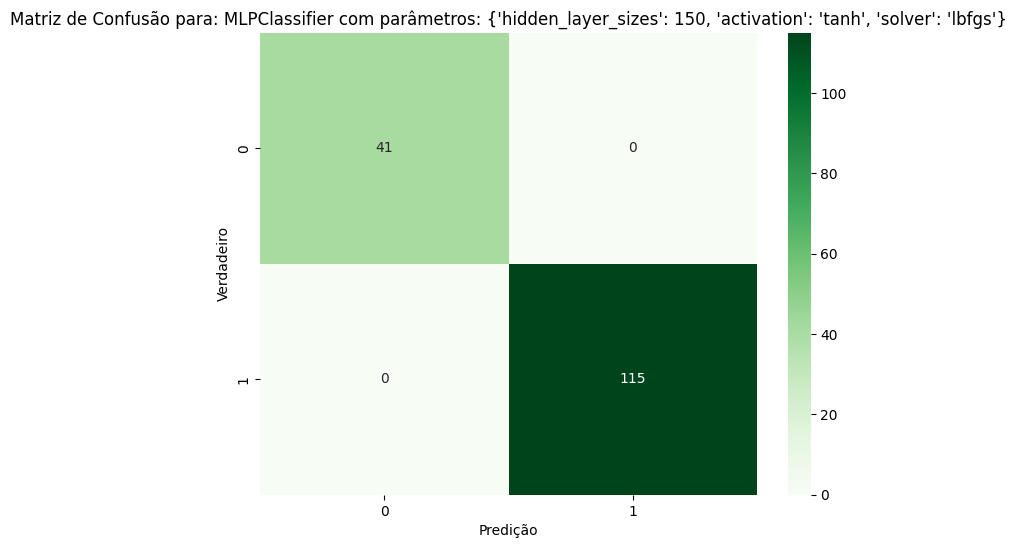

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00       115

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


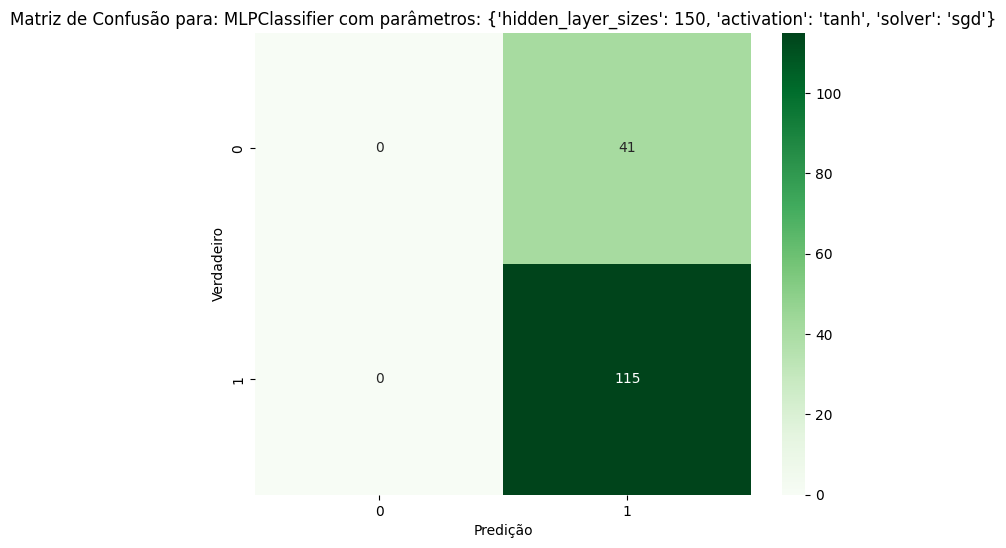

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.74      1.00      0.85       115

    accuracy                           0.74       156
   macro avg       0.37      0.50      0.42       156
weighted avg       0.54      0.74      0.63       156



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.neural_network import MLPClassifier  # Para classificação
from sklearn.neural_network import MLPRegressor   # Para regressão
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix, f1_score, precision_score

def model_training(model, parameters, X_train, y_train, X_test, y_test, random_state=43):

    metricas = []

    for params in (parameters):
        mod = model(**params)
        mod.fit(X_train, y_train)

        predict_train = mod.predict(X_train)
        predict_test = mod.predict(X_test)

        acc = accuracy_score(y_test, predict_test)
        recall = recall_score(y_test, predict_test)
        f1 = f1_score(y_test, predict_test)
        precision = precision_score(y_test, predict_test)

        metricas.append(
            {
                str(params): {
                    'acc': acc,
                    'recall': recall,
                    'f1-score': f1,
                    'precision': precision
                }
            }
        )

        # Calcular e plotar a matriz de confusão
        cm = confusion_matrix(y_test, predict_test)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                    xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel('Predição')
        plt.ylabel('Verdadeiro')
        plt.title(f'Matriz de Confusão para: {model.__name__} com parâmetros: {params}')
        plt.show()

        # Imprimir o relatório de classificação
        print(classification_report(y_test, predict_test))


    return metricas

parameters = [
    {'hidden_layer_sizes': h, 'activation': a, 'solver': s}
    for h in [50, 100, 150]
    for a in ['relu','tanh']
    for s in ['lbfgs', 'sgd']
]

metricas = model_training(MLPClassifier, parameters, X, y, X_train, y_train)


In [ ]:
# Para extrair as métricas de acurácia e recall
accuracies = []
recalls = []
f1_score = []
precision_score = []
i = 0

for m in metricas:
    for params, metrics in m.items():
        accuracies.append(metrics['acc'])  # Acurácia do modelo
        recalls.append(metrics['recall'])  # Recall do modelo
        f1_score.append(metrics['f1-score'])  # F1-score do modelo
        precision_score.append(metrics['precision'])  # Precisão do modelo
        print("Modelo " , i + 1)
        print(accuracies[i])
        print(recalls[i])
        print(f1_score[i])
        print(precision_score[i])
        print("\n")
    i += 1

Modelo  1
1.0
1.0
1.0
1.0


Modelo  2
0.7371794871794872
1.0
0.8487084870848709
0.7371794871794872


Modelo  3
1.0
1.0
1.0
1.0


Modelo  4
0.7371794871794872
1.0
0.8487084870848709
0.7371794871794872


Modelo  5
1.0
1.0
1.0
1.0


Modelo  6
0.7371794871794872
1.0
0.8487084870848709
0.7371794871794872


Modelo  7
1.0
1.0
1.0
1.0


Modelo  8
0.7371794871794872
1.0
0.8487084870848709
0.7371794871794872


Modelo  9
1.0
1.0
1.0
1.0


Modelo  10
0.7371794871794872
1.0
0.8487084870848709
0.7371794871794872


Modelo  11
1.0
1.0
1.0
1.0


Modelo  12
0.7371794871794872
1.0
0.8487084870848709
0.7371794871794872




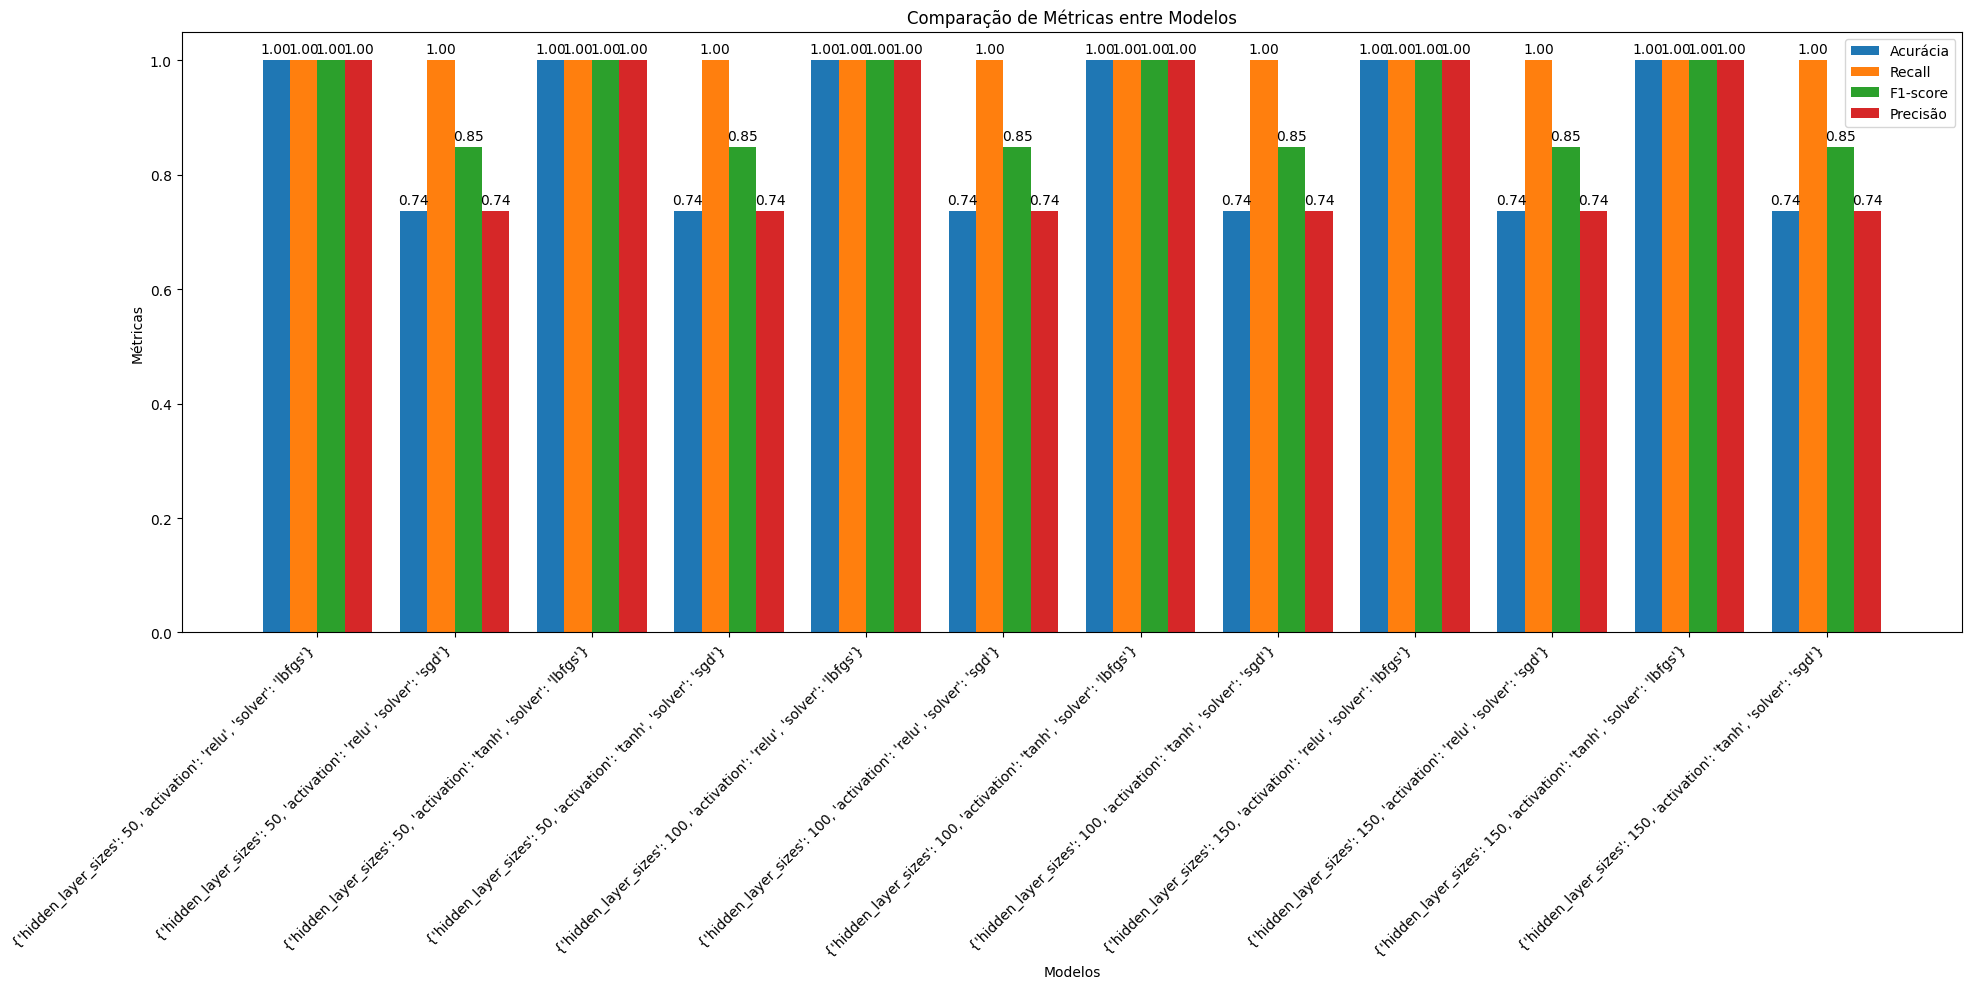

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assumindo que metricas já foi gerada pela função model_training
# E que accuracies, recalls, f1_scores e precision_scores já estão preenchidos

# Nome dos modelos (você pode customizar isso conforme os modelos que está utilizando)
model_names = [str(params) for m in metricas for params in m.keys()]

# Crie um array com os índices dos modelos
x = np.arange(len(model_names))

# Tamanho das barras
width = 0.2

# Crie uma figura e um conjunto de subplots
fig, ax = plt.subplots(figsize=(20, 10))

# Plote cada métrica
bars1 = ax.bar(x - 1.5 * width, accuracies, width, label='Acurácia')
bars2 = ax.bar(x - 0.5 * width, recalls, width, label='Recall')
bars3 = ax.bar(x + 0.5 * width, f1_score, width, label='F1-score')
bars4 = ax.bar(x + 1.5 * width, precision_score, width, label='Precisão')

# Adicionando labels e título
ax.set_xlabel('Modelos')
ax.set_ylabel('Métricas')
ax.set_title('Comparação de Métricas entre Modelos')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

# Exibir os valores nas barras
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 pontos acima da barra
                    textcoords="offset points",
                    ha='center', va='bottom')

# Exibir o gráfico
plt.tight_layout()
plt.show()
